In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import functions.helperfunctions as hf
from PairingVDJdb_MI import _define_individuals
import functions.myfunctions as mf
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
# epcounts = vdj['Epitope'].value_counts()
# epitopes = epcounts.loc[epcounts<1000].index.values
# vdj = vdj.loc[vdj['Epitope'].isin(epitopes)]

In [3]:
ff0 = 'data/output/pairing_GA/all_eps/'
ff1 = 'data/output/pairing_GA/big_eps_700/'

In [4]:
chosenDist = 'lev'

In [5]:
allresults_tpr_ga=[]
allresults_recall_ga=[]
allresults_mode_ga=[]

for f in os.listdir(ff0):
    if ('.csv' in f) & (chosenDist in f) & ('vgene-no' in f):
        print(f)
        f1 = f.replace('n_repeats', 'nrepeats')
        f1 = f1.replace('distance_type', 'distanceType')
        f1 = f1.replace('GA-', '')
        print(f1)
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        r = pd.read_csv(ff0+f, index_col=0)
        # print(r.head())
        correctPairs = (r['alpha'] + '::' + r['correct_beta'] + '::' + r['subject-PMID']).tolist()
        R = pd.DataFrame()
        R_recall = pd.Series()
        for c in r.columns:
            if 'repeat' in c:
                pairs = (r['alpha'] + '::' + r[c] + '::' + r['subject-PMID']).tolist()
                R[c] = [p in correctPairs for p in pairs]
                recall = sum([int(p in correctPairs) for p in set(pairs)])
                # print(recall)
                R_recall[c]=recall
        # print(R_recall)
        results = pd.DataFrame(R.sum(), columns=['num_correct']).reset_index(names='repeat')
        results['epitope'] = properties['epitope']
        results['distance']=properties['distanceType']
        results['k'] = properties['kNN']
        results['N'] = r.shape[0] 
        results['prop_correct'] = results['num_correct']/results['N']       
        allresults_tpr_ga.append(results)

        results = pd.DataFrame(R_recall, columns=['num_correct']).reset_index(names='repeat')
        results['epitope'] = properties['epitope']
        results['distance']=properties['distanceType']
        results['k'] = properties['kNN']
        results['N'] = r.shape[0] 
        results['prop_correct'] = results['num_correct']/results['N']       
        allresults_recall_ga.append(results)

        Rmode = r[['mode','correct','mode_freq']].copy()
        Rmode['epitope'] = properties['epitope']
        Rmode['distance']=properties['distanceType']
        Rmode['k'] = properties['kNN']
        Rmode['N'] = r.shape[0] 
        allresults_mode_ga.append(Rmode)

GA-epitope-ASNENMETM_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-ASNENMETM_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-ATDALMTGF_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-ATDALMTGF_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-CINGVCWTV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-CINGVCWTV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-ELAGIGILTV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-ELAGIGILTV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GLCTLVAML_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-HGIRNASFI_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-HGIRNASFI_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-IVTDFSVIK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-IVTDFSVIK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-KSKRTPMGF_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-KSKRTPMGF_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-LLWNGPMAV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-LLWNGPMAV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-LSLRNPILV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-LSLRNPILV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-LTDEMIAQY_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-LTDEMIAQY_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-NLVPMVATV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-NLVPMVATV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RLRAEAQVK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RLRAEAQVK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-SPRWYFYYL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-SPRWYFYYL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-SSLENFRAYV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-SSLENFRAYV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-SSPPMFRV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-SSPPMFRV_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-SSYRRPVGI_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-SSYRRPVGI_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-TTDPSFLGRY_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-TTDPSFLGRY_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-YLQPRTFLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-YLQPRTFLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/658929616.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


In [6]:
for ff10 in os.listdir(ff1):
    if 'txt' not in ff10:
        for f in os.listdir(ff1+ff10):
            if ('.csv' in f) & ('vgene-no' in f) & (chosenDist in f) & ('KLGGALQAK' not in f):
                print(f)
                f1 = f.replace('n_repeats', 'nrepeats')
                f1 = f1.replace('distance_type', 'distanceType')
                f1 = f1.replace('GA-', '')
                print(f1)
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                r = pd.read_csv(ff1 + ff10+ '/' + f, index_col=0)
                # print(r.head())
                correctPairs = (r['alpha'] + '::' + r['correct_beta'] + '::' + r['subject-PMID']).tolist()
                R = pd.DataFrame()
                R_recall = pd.Series()
                for c in r.columns:
                    if 'repeat' in c:
                        pairs = (r['alpha'] + '::' + r[c] + '::' + r['subject-PMID']).tolist()
                        R[c] = [p in correctPairs for p in pairs]
                        recall = sum([int(p in correctPairs) for p in set(pairs)])
                        # print(recall)
                        R_recall[c]=recall
                # print(R_recall)
                results = pd.DataFrame(R.sum(), columns=['num_correct']).reset_index(names='repeat')
                results['epitope'] = properties['epitope']   + '_' + str(ff10)
                results['distance']=properties['distanceType']
                results['k'] = properties['kNN']
                results['N'] = r.shape[0] 
                results['prop_correct'] = results['num_correct']/results['N']       
                allresults_tpr_ga.append(results)

                results = pd.DataFrame(R_recall, columns=['num_correct']).reset_index(names='repeat')
                results['epitope'] = properties['epitope']  + '_' + str(ff10)
                results['distance']=properties['distanceType']
                results['k'] = properties['kNN']
                results['N'] = r.shape[0] 
                results['prop_correct'] = results['num_correct']/results['N']       
                allresults_recall_ga.append(results)

                Rmode = r[['mode','correct','mode_freq']].copy()
                Rmode['epitope'] = properties['epitope']   + '_' + str(ff10)
                Rmode['distance']=properties['distanceType']
                Rmode['k'] = properties['kNN']
                Rmode['N'] = r.shape[0] 
                allresults_mode_ga.append(Rmode)

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-AVFDRKSDAK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GILGFVFTL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RAKFKQLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-AVFDRKSDAK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GILGFVFTL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RAKFKQLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-AVFDRKSDAK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GILGFVFTL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RAKFKQLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-AVFDRKSDAK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GILGFVFTL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RAKFKQLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-AVFDRKSDAK_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-GILGFVFTL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz
epitope-RAKFKQLL_ind-no_vgene-no_distanceType-lev_kNN-20_nrepeats-100.csv.gz


/tmp/ipykernel_176188/2901426696.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R_recall = pd.Series()


In [7]:
all_results_tpr_ga = pd.concat(allresults_tpr_ga)
all_results_recall_ga = pd.concat(allresults_recall_ga)

In [8]:
print(all_results_tpr_ga)

       repeat  num_correct     epitope distance   k    N  prop_correct
0     repeat1           85   ASNENMETM      lev  20  201      0.422886
1     repeat2           97   ASNENMETM      lev  20  201      0.482587
2     repeat3           91   ASNENMETM      lev  20  201      0.452736
3     repeat4           67   ASNENMETM      lev  20  201      0.333333
4     repeat5           68   ASNENMETM      lev  20  201      0.338308
..        ...          ...         ...      ...  ..  ...           ...
95   repeat96          118  RAKFKQLL_4      lev  20  700      0.168571
96   repeat97          101  RAKFKQLL_4      lev  20  700      0.144286
97   repeat98           88  RAKFKQLL_4      lev  20  700      0.125714
98   repeat99           92  RAKFKQLL_4      lev  20  700      0.131429
99  repeat100          111  RAKFKQLL_4      lev  20  700      0.158571

[3400 rows x 7 columns]


In [9]:
all_results_tpr_mode_ga = pd.concat(allresults_mode_ga)
modes = all_results_tpr_mode_ga[['correct','epitope','distance','k','N']].groupby(['correct','epitope','distance','k','N']).size().reset_index().rename(columns={0:'count'})
modes['prop'] = modes['count']/modes['N']
modes_ga_c = modes.loc[modes['correct'] == True]
print(modes_ga_c)

    correct       epitope distance   k    N  count      prop
34     True     ASNENMETM      lev  20  201     85  0.422886
35     True     ATDALMTGF      lev  20  125      3  0.024000
36     True  AVFDRKSDAK_0      lev  20  700     11  0.015714
37     True  AVFDRKSDAK_1      lev  20  700     16  0.022857
38     True  AVFDRKSDAK_2      lev  20  700      9  0.012857
39     True  AVFDRKSDAK_3      lev  20  700     16  0.022857
40     True  AVFDRKSDAK_4      lev  20  700      3  0.004286
41     True     CINGVCWTV      lev  20  226      8  0.035398
42     True    ELAGIGILTV      lev  20  380     17  0.044737
43     True   GILGFVFTL_0      lev  20  700    119  0.170000
44     True   GILGFVFTL_1      lev  20  700    120  0.171429
45     True   GILGFVFTL_2      lev  20  700    108  0.154286
46     True   GILGFVFTL_3      lev  20  700    116  0.165714
47     True   GILGFVFTL_4      lev  20  700     89  0.127143
48     True     GLCTLVAML      lev  20  345     87  0.252174
49     True     HGIRNASF

In [10]:
all_results_tpr_ga.to_csv('GA_results_TPR.csv')

In [11]:
ff1 = 'data/output/pairing_MI-IPA/all_eps_noconf/'
ff2 = 'data/output/pairing_MI-IPA/best_perf_noconf/'
ff3 = 'data/output/pairing_MI-IPA/big_eps_noconf_700/'
ff4 = 'data/output/pairing_MI-IPA/big_eps_best_noconf_700/'

ff5 = 'data/output/pairing_GAMI/all_eps_L06/'
ff6 = 'data/output/pairing_GAMI/big_eps_700_L06/'

In [12]:
allresults_mi = []
# mode_results_mi = pd.DataFrame()
for f in os.listdir(ff1):
    if ('.csv' in f) & ('vgene-no' in f):
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        results, N = hf.load_df_TPR(ff1 + f)
        results = pd.DataFrame(np.array(np.array([x for x in results])))
        its = results.shape[1]-1
        results['test_size'] = N
        results['final_test'] = results[its]
        results['final_test_prop'] = results[its] / N
        results['epitope'] = properties['epitope']
        results['vgene'] = properties['vgene']
        results['L'] = properties['L']
        allresults_mi.append(results[['test_size','final_test','final_test_prop','epitope','L','vgene']])

        # this second half calculates the mode
        # df = hf.load_df(ff1 + f)

        # epdf = _define_individuals(vdj, properties['epitope'], 'no')
        # epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
        # a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
        # a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
        # epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
        # a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
        # a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
        # epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

        # df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
        # df_mode = df_final[['mode_freq','correct']]
        # df_mode['L'] = properties['L']
        # df_mode['epitope'] = properties['epitope']
        # mode_results_mi = pd.concat([mode_results_mi,df_mode])

        # print(mode_results_mi)

epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ASNENMETM_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ATDALMTGF_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-CINGVCWTV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-CINGVCWTV_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ELAGIGILTV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_cor

In [13]:
for ff30 in os.listdir(ff3):
    if 'txt' not in ff30:
        for f in os.listdir(ff3 + ff30):
            if ('.csv' in f) & ('vgene-no' in f) & ('KLGGALQAK' not in f):
                print(ff30, f)
                f1 = f.replace('small_ind', 'smallInd')
                f1 = f1.replace('prop_test', 'propTest')
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                results, N = hf.load_df_TPR(ff3 + ff30 +'/' + f)
                results = pd.DataFrame(np.array(np.array([x for x in results])))
                its = results.shape[1]-1
                results['test_size'] = N
                results['final_test'] = results[its]
                results['final_test_prop'] = results[its] / N
                results['epitope'] = properties['epitope']  + '_' + str(ff30)
                results['vgene'] = properties['vgene']
                results['L'] = properties['L']
                allresults_mi.append(results[['test_size','final_test','final_test_prop','epitope','L','vgene']])

                # this second half calculates the mode
                # start = time.time()
                # df = hf.load_df(ff3 + ff30 +'/' + f)
                # print(time.time()-start)

                # epdf = _define_individuals(vdj, properties['epitope'], 'no')
                # epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                # a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                # a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                # epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                # a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                # a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                # epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

                # df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                # df_mode = df_final[['mode_freq','correct']]
                # df_mode['L'] = properties['L']
                # df_mode['epitope'] = properties['epitope']  + '_' + str(ff30)
                # mode_results_mi = pd.concat([mode_results_mi,df_mode])

                # print(mode_results_mi)

0 epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
0 epitope-AVFDRKSDAK_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
0 epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
0 epitope-GILGFVFTL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
0 epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
0 epitope-RAKFKQLL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
1 epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confi

In [14]:
# gm = mode_results_mi[['epitope','L','correct']].groupby(['epitope','L','correct']).size().reset_index()
# gm1 = gm.groupby(['epitope','L']).sum().reset_index()[['epitope','L',0]]
# gm = gm.rename(columns={0:'counts'})
# gm1 = gm1.rename(columns={0:'N'})

# grouped_mode_mi = pd.merge(gm, gm1)
# grouped_mode_mi['prop'] = grouped_mode_mi['counts']/grouped_mode_mi['N']
# # print(grouped_mode_mi)
# grouped_mode_mi_c = grouped_mode_mi.loc[grouped_mode_mi['correct'] == True].reset_index(drop=True)
# print(grouped_mode_mi_c)

In [15]:
allresults_best = []
for f in os.listdir(ff2):
    if ('.csv' in f) & ('vgene-no' in f):
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        results, N = hf.load_df_TPR(ff2 + f)
        results = pd.DataFrame(np.array(np.array([x for x in results])))
        its = results.shape[1]-1
        results['test_size'] = N
        results['final_test'] = results[its]
        results['final_test_prop'] = results[its] / N
        results['epitope'] = properties['epitope']
        results['L'] = properties['L']
        results['confidence'] = properties['confidence']
        results['vgene'] = properties['vgene']
        allresults_best.append(results[['test_size','final_test','final_test_prop','epitope','L', 'confidence','vgene']])

epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-CINGVCWTV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-ELAGIGILTV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-HGIRNASFI_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-IVTDFSVIK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_tr

In [16]:
for ff40 in os.listdir(ff4):
    if 'txt' not in ff40:
        for f in os.listdir(ff4 + ff40):
            if ('.csv' in f) & ('vgene-no' in f) & ('KLGGALQAK' not in f):
                print(f)
                f1 = f.replace('small_ind', 'smallInd')
                f1 = f1.replace('prop_test', 'propTest')
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                results, N = hf.load_df_TPR(ff4 + ff40 + '/' + f)
                results = pd.DataFrame(np.array(np.array([x for x in results])))
                its = results.shape[1]-1
                results['test_size'] = N
                results['final_test'] = results[its]
                results['final_test_prop'] = results[its] / N
                results['epitope'] = properties['epitope']  + '_' + str(ff40)
                results['L'] = properties['L']
                results['confidence'] = properties['confidence']
                results['vgene'] = properties['vgene']
                allresults_best.append(results[['test_size','final_test','final_test_prop','epitope','L', 'confidence','vgene']])

epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_tr

In [17]:
all_results_mi = pd.concat(allresults_mi)
all_results_mi = all_results_mi.sort_values(by='epitope')

In [18]:
all_results_mi.to_csv('MI-IPA_results_TPR.csv')

In [19]:
best_results = pd.concat(allresults_best)
best_results = best_results.loc[(best_results['confidence'] == 'none') & (best_results['L'] == '0.6')].sort_values(by='epitope')

In [20]:
best_results

,test_size,final_test,final_test_prop,epitope,L,confidence,vgene
0,201,144.0,0.716418,ASNENMETM,0.6,none,no
0,125,75.0,0.600000,ATDALMTGF,0.6,none,no
0,700,87.0,0.124286,AVFDRKSDAK_0,0.6,none,no
0,700,98.0,0.140000,AVFDRKSDAK_1,0.6,none,no
0,700,82.0,0.117143,AVFDRKSDAK_2,0.6,none,no
0,700,72.0,0.102857,AVFDRKSDAK_3,0.6,none,no
0,700,84.0,0.120000,AVFDRKSDAK_4,0.6,none,no
0,226,100.0,0.442478,CINGVCWTV,0.6,none,no
0,380,76.0,0.200000,ELAGIGILTV,0.6,none,no
0,700,110.0,0.157143,GILGFVFTL_0,0.6,none,no


In [21]:
all_results_nolearning = all_results_mi.loc[all_results_mi['L'] == '1.0']
all_results_mi1 = all_results_mi.loc[all_results_mi['L'] == '0.6']

In [22]:
all_results_nolearning

,test_size,final_test,final_test_prop,epitope,L,vgene
9,201,41.0,0.203980,ASNENMETM,1.0,no
8,201,42.0,0.208955,ASNENMETM,1.0,no
7,201,50.0,0.248756,ASNENMETM,1.0,no
6,201,35.0,0.174129,ASNENMETM,1.0,no
5,201,43.0,0.213930,ASNENMETM,1.0,no
...,...,...,...,...,...,...
7,333,12.0,0.036036,YLQPRTFLL,1.0,no
1,333,17.0,0.051051,YLQPRTFLL,1.0,no
5,333,12.0,0.036036,YLQPRTFLL,1.0,no
0,333,9.0,0.027027,YLQPRTFLL,1.0,no


In [23]:
all_results_mi1

,test_size,final_test,final_test_prop,epitope,L,vgene
0,201,81.0,0.402985,ASNENMETM,0.6,no
8,201,82.0,0.407960,ASNENMETM,0.6,no
7,201,82.0,0.407960,ASNENMETM,0.6,no
6,201,76.0,0.378109,ASNENMETM,0.6,no
5,201,79.0,0.393035,ASNENMETM,0.6,no
...,...,...,...,...,...,...
3,333,34.0,0.102102,YLQPRTFLL,0.6,no
2,333,13.0,0.039039,YLQPRTFLL,0.6,no
1,333,32.0,0.096096,YLQPRTFLL,0.6,no
0,333,25.0,0.075075,YLQPRTFLL,0.6,no


In [24]:
allresults_gami = []

for f in os.listdir(ff5):
    if ('.csv' in f) & ('vgene-no' in f):
        print(f)
        f1 = f.replace('small_ind', 'smallInd')
        f1 = f1.replace('prop_test', 'propTest')
        f1 = f1.replace('GA_repeats', 'GArepeats')
        f1 = f1.replace('MI_repeats', 'MIrepeats')
        f1 = f1.replace('distance_type', 'disttype')
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        results, N = hf.load_df_TPR(ff5 + f)
        results = pd.DataFrame(np.array(np.array([x for x in results])))
        its = results.shape[1]-1
        results['test_size'] = N
        results['final_test'] = results[its]
        results['final_test_prop'] = results[its] / N
        results['epitope'] = properties['epitope']
        results['L'] = properties['L']
        results['confidence'] = properties['confidence']
        results['vgene'] = properties['vgene']
        allresults_gami.append(results[['test_size','final_test','final_test_prop','epitope','L', 'confidence','vgene']])

epitope-NLVPMVATV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-SSYRRPVGI_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-SSPPMFRV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-HGIRNASFI_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-LSLRNPILV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_tran

In [25]:
for ff60 in os.listdir(ff6):
    if 'txt' not in ff60:
        for f in os.listdir(ff6 + ff60):
            if ('.csv' in f) & ('vgene-no' in f) & ('KLGGALQAK' not in f):
                print(f)
                f1 = f.replace('small_ind', 'smallInd')
                f1 = f1.replace('prop_test', 'propTest')
                f1 = f1.replace('GA_repeats', 'GArepeats')
                f1 = f1.replace('MI_repeats', 'MIrepeats')
                f1 = f1.replace('distance_type', 'disttype')
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                results, N = hf.load_df_TPR(ff6 + ff60 + '/' + f)
                results = pd.DataFrame(np.array(np.array([x for x in results])))
                its = results.shape[1]-1
                results['test_size'] = N
                results['final_test'] = results[its]
                results['final_test_prop'] = results[its] / N
                results['epitope'] = properties['epitope'] + '_' + str(ff60)
                results['L'] = properties['L']
                results['confidence'] = properties['confidence']
                results['vgene'] = properties['vgene']
                allresults_gami.append(results[['test_size','final_test','final_test_prop','epitope','L', 'confidence','vgene']])

epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_tran

In [26]:
gami_results = pd.concat(allresults_gami)
gami_results = gami_results.loc[(gami_results['confidence'] == 'none') & (gami_results['L'] == '0.6')].sort_values(by='epitope')

In [27]:
gami_results.to_csv('GA+MI-IPA_results_TPR.csv')

In [28]:
all_results_nolearning = all_results_nolearning.rename(columns={'final_test_prop':'no learning'})
all_results_mi1 = all_results_mi1.rename(columns={'final_test_prop':'MI-IPA'})
best_results = best_results.rename(columns={'final_test_prop':'theoretical best'})
gami_results = gami_results.rename(columns={'final_test_prop':'GA+MI-IPA'})

In [29]:
all_results_tpr_ga = all_results_tpr_ga.rename(columns={'prop_correct':'GA'})

In [30]:
df = pd.merge(all_results_nolearning[['epitope','vgene','no learning']],all_results_mi1[['epitope','vgene','MI-IPA']], how='outer')
# print(df)
df = pd.merge(df,best_results[['epitope','vgene','theoretical best']], how='outer')
df = pd.merge(df,gami_results[['epitope','vgene','GA+MI-IPA']], how='outer')
df = pd.merge(df, all_results_tpr_ga[['epitope','GA']], how='inner').drop_duplicates()
print(df)


           epitope vgene  no learning    MI-IPA  theoretical best  GA+MI-IPA  \
0        ASNENMETM    no     0.203980  0.402985          0.716418    0.39801   
1        ASNENMETM    no     0.203980  0.402985          0.716418    0.39801   
2        ASNENMETM    no     0.203980  0.402985          0.716418    0.39801   
3        ASNENMETM    no     0.203980  0.402985          0.716418    0.39801   
4        ASNENMETM    no     0.203980  0.402985          0.716418    0.39801   
...            ...   ...          ...       ...               ...        ...   
3388746  YLQPRTFLL    no     0.027027  0.075075          0.225225    0.09009   
3388748  YLQPRTFLL    no     0.027027  0.075075          0.225225    0.09009   
3388788  YLQPRTFLL    no     0.027027  0.075075          0.225225    0.09009   
3388791  YLQPRTFLL    no     0.027027  0.075075          0.225225    0.09009   
3388797  YLQPRTFLL    no     0.027027  0.075075          0.225225    0.09009   

               GA  
0        0.422886  

ASNENMETM
ATDALMTGF
AVFDRKSDAK_0
AVFDRKSDAK_1
AVFDRKSDAK_2
AVFDRKSDAK_3
AVFDRKSDAK_4
CINGVCWTV
ELAGIGILTV
GILGFVFTL_0
GILGFVFTL_1
GILGFVFTL_2
GILGFVFTL_3
GILGFVFTL_4
GLCTLVAML
HGIRNASFI
IVTDFSVIK
KSKRTPMGF
LLWNGPMAV
LSLRNPILV
LTDEMIAQY
NLVPMVATV
RAKFKQLL_0
RAKFKQLL_1
RAKFKQLL_2
RAKFKQLL_3
RAKFKQLL_4
RLRAEAQVK
SPRWYFYYL
SSLENFRAYV
SSPPMFRV
SSYRRPVGI
TTDPSFLGRY
YLQPRTFLL


/tmp/ipykernel_176188/3150268397.py:53: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,pval = ttest_ind(gami['GA+MI-IPA'], bb['no learning'], alternative='greater')


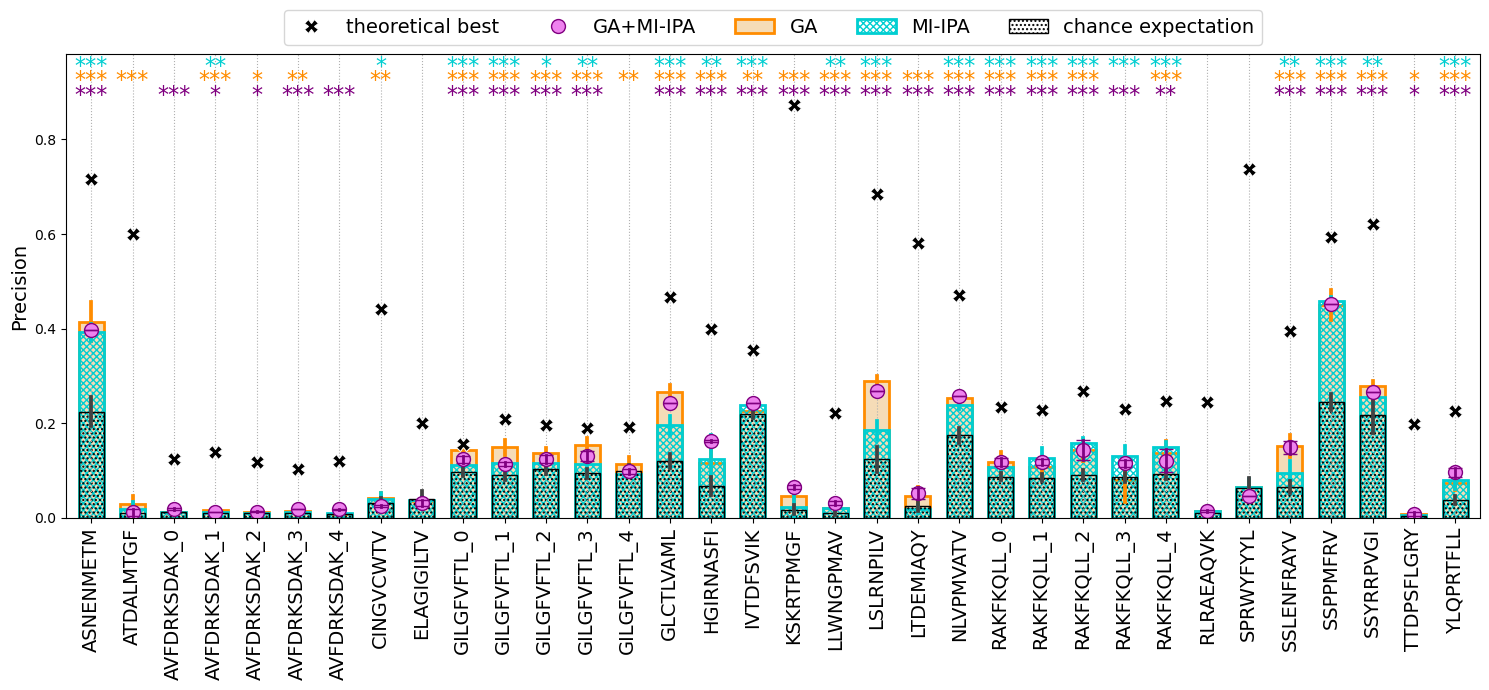

In [31]:
f,ax=plt.subplots(figsize=(15,7), sharex=True)
sns.barplot(all_results_tpr_ga.sort_values(by='epitope'), x='epitope', y='GA', width=0.6,
             errorbar='sd', ax=ax, edgecolor = 'darkorange', errcolor='darkorange', 
             linewidth=2,
             label='GA', color='navajowhite')
sns.barplot(all_results_mi1.sort_values(by='epitope'), x='epitope', y='MI-IPA', width=0.6, linewidth=2,
             errorbar='sd', ax=ax, edgecolor = 'darkturquoise', facecolor='none', 
             errcolor = 'darkturquoise',
             hatch='xxxxx', label='MI-IPA')
sns.barplot(data=all_results_nolearning.sort_values(by='epitope'), x='epitope', y='no learning', width=0.6,
             errorbar='sd', ax=ax, edgecolor = 'black', facecolor='none', hatch='....', label='chance expectation')
sns.lineplot(data=best_results.sort_values(by='epitope'), x='epitope',y='theoretical best', color='k',
             ax=ax, linestyle = '', marker = 'X', markersize=10, errorbar=None, label = 'theoretical best')
sns.lineplot(data=gami_results.sort_values(by='epitope'), x='epitope', y='GA+MI-IPA', color='violet', 
             ax=ax, linestyle = '', marker = 'o', markersize=10, mew=1, mec='purple',
             errorbar='sd', err_style='bars', err_kws={'ecolor':'purple', 'capsize':5, 'linewidth':2},
             label = 'GA+MI-IPA')

## code below plots modes
# sns.lineplot(data=modes_ga_c.sort_values(by='epitope'), x='epitope',y='prop', color='white', mec='darkorange',
#              ax=ax, linestyle = '', marker = 'o', markersize=10, errorbar=None, label = 'GA mode')
# sns.lineplot(data=modes_ga_c.sort_values(by='epitope'), x='epitope',y='prop', color='darkorange',mec='darkorange',
#              ax=ax, linestyle = '', marker = 'o', markersize=3, errorbar=None)
# sns.lineplot(data=grouped_mode_mi_c.loc[grouped_mode_mi_c['L'] == '0.6'].sort_values(by='epitope'), 
#              x='epitope',y='prop', color='white', mec='darkturquoise',
#              ax=ax, linestyle = '', marker = 's', markersize=10, errorbar=None, label = 'MI-IPA mode')
# sns.lineplot(data=grouped_mode_mi_c.loc[grouped_mode_mi_c['L'] == '0.6'].sort_values(by='epitope'), 
#              x='epitope',y='prop', color='darkturquoise', mec='darkturquoise',
#              ax=ax, linestyle = '', marker = 's', markersize=3, errorbar=None)
# sns.lineplot(data=grouped_mode_mi_c.loc[grouped_mode_mi_c['L'] == '1.0'].sort_values(by='epitope'), 
#              x='epitope',y='prop', color='white', mec='k',
#              ax=ax, linestyle = '', marker = '^', markersize=10, errorbar=None, label = 'MI-IPA mode')
# sns.lineplot(data=grouped_mode_mi_c.loc[grouped_mode_mi_c['L'] == '1.0'].sort_values(by='epitope'), 
#              x='epitope',y='prop', color='k', mec='k',
#              ax=ax, linestyle = '', marker = '^', markersize=3, errorbar=None)

ax.set_xticklabels(all_results_tpr_ga.sort_values(by='epitope')['epitope'].unique(), fontdict={'size':14}, rotation=90)
ax.set_xlabel('')
ax.set_ylabel('Precision', fontdict={'size':14})
h,l=ax.get_legend_handles_labels()
for j,ep in enumerate(all_results_tpr_ga.sort_values(by='epitope')['epitope'].unique()):
    print(ep)
    bb = all_results_nolearning.loc[all_results_nolearning['epitope'] == ep]
    mi = all_results_mi1.loc[all_results_mi1['epitope'] == ep]
    ga = all_results_tpr_ga.loc[all_results_tpr_ga['epitope'] == ep]
    gami = gami_results.loc[gami_results['epitope'] == ep]
    t,pval = ttest_ind(mi['MI-IPA'], bb['no learning'], alternative='greater')
    p = '***' if pval<0.001 else '**' if pval<0.01 else '*' if pval<0.05 else ''
    ax.text(j, 0.94, p, fontdict={'size':16, 'color':'darkturquoise'}, ha='center')
    t,pval = ttest_ind(ga['GA'], bb['no learning'], alternative='greater')
    p = '***' if pval<0.001 else '**' if pval<0.01 else '*' if pval<0.05 else ''
    ax.text(j, 0.91, p, fontdict={'size':16, 'color':'darkorange'}, ha='center')
    t,pval = ttest_ind(gami['GA+MI-IPA'], bb['no learning'], alternative='greater')
    p = '***' if pval<0.001 else '**' if pval<0.01 else '*' if pval<0.05 else ''
    ax.text(j, 0.88, p, fontdict={'size':16, 'color':'purple'}, ha='center')

ax.set_ylim(0,0.98)
ax.set_xlim(-0.6,len(all_results_tpr_ga['epitope'].unique())-0.4)
ax.grid(axis='x', ls=':')
plt.legend(h,l,fontsize=14, ncol=5, bbox_to_anchor=[0.5,1], loc='lower center')
plt.tight_layout()
plt.savefig('figures/all_epitopes_TPR_with_MI_GA_noconf_lev20.png',
                    bbox_inches='tight')
plt.show()

In [32]:
# fig, ax = plt.subplots(figsize=(10,5))
# sns.barplot(all_results_tpr.sort_values(by='epitope'), x='epitope', y='prop_correct', width=0.6,
#              errorbar=('ci',95), ax=ax, edgecolor = 'black')
# sns.barplot(all_results_recall.sort_values(by='epitope'), x='epitope', y='prop_correct', width=0.6,
#              errorbar=('ci',95), ax=ax, edgecolor = 'black', hatch='////', fill=False)
# # ax[0].get_legend().remove()
# # ax[1].set_ylim(ax[0].get_ylim())
# ax.set_xticklabels(all_results_tpr.sort_values(by='epitope')['epitope'].unique(), fontdict={'size':14}, rotation=90)
# # ax[1].legend(bbox_to_anchor=[1.05,1], loc='upper left')
# # ax[0].set_ylabel('TPR', fontdict={'size':14})
# # ax[1].set_ylabel('recall',lluihiljjjththkhgmli   ,v


# # ax.set_xlabel()
# # ax[1].set_xlabel(r'$k$', fontdict={'size':14})
# plt.tight_layout()